In [1]:
using Pkg, Revise
Pkg.activate(joinpath(@__DIR__, "../.."))
using EasyABM

  Activating project at `~/Documents/EasyABM`


WebIO._IJuliaInit()

In [16]:
model = create_2d_model(size = (50,50), space_type=NPeriodic)

EasyABM SpaceModel2D{Static, Int64, NPeriodic}: In a Static model number of agents is fixed.


In [17]:
function initialiser!(model)
    for j in 1:model.size[2]
        for i in 1:model.size[1]
            model.patches[i,j].color = cl"white"
            model.patches[i,j].val = 0
        end
    end
    model.patches[25,1].color = cl"black"
    model.patches[25,1].val = 1
end

init_model!(model, initialiser = initialiser!, props_to_record = Dict("patches" => Set([:color,:val])))   

In [18]:
rules = Dict((1,1,1)=>0, (1,1,0)=>0, (1,0,1)=>0, (0,1,1)=>1, 
(1,0,0)=>1, (0,1,0)=>1, (0,0,1)=>1, (0,0,0)=>0) # rule 30


function update_from_row_below(row, model)
    for j in 2:(model.size[1]-1)
        vals = (model.patches[j-1, row-1].val, 
                model.patches[j,   row-1].val, 
                model.patches[j+1, row-1].val)   
        val = rules[vals]
        model.patches[j, row].val = val
        model.patches[j, row].color = val==0 ? cl"white" : cl"black"
    end
end

function copy_to_row_below(row, model)
    for j in 1:model.size[1]
        model.patches[j, row-1].val = model.patches[j, row].val
        model.patches[j, row-1].color = model.patches[j, row].color
    end
end

function step_rule!(model)
    if model.tick < model.size[1]
        row = model.tick+1
        update_from_row_below(row, model)      
    else
        for i in 2:model.size[1]
            copy_to_row_below(i, model)
        end
        update_from_row_below(model.size[1], model)
    end
        
end

step_rule! (generic function with 1 method)

In [19]:
run_model!(model, steps = 200, step_rule = step_rule!)

In [20]:
animate_sim(model, show_grid=true)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(101), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f783c7c9910, Task (runnable) @0x00007f783c7c9910), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 140155195122288, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            )

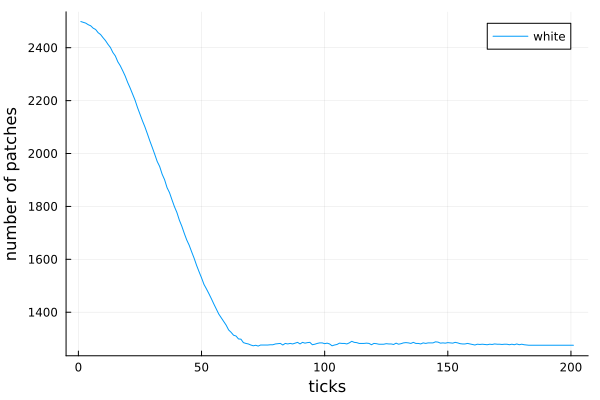

Row,white
,Int64
1,2499
2,2496
3,2493
4,2487
5,2483
6,2474
7,2469
8,2457
9,2450


In [21]:
df = get_nums_patches(model, 
    patch-> patch.color == cl"white", 
    labels=["white"], plot_result=true)